# THE SPARKS FOUNDATION
                                     (GRIPNOV20)
Author : BEMBERKAR SHASHANK SAI

DATASCIENCE AND BUSINESS ANALYTICS

TASK 2:Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
#LOAD DATA
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
#EXPLORATORY DATA ANALYSIS
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df.isna().any

<bound method DataFrame.any of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                False             False              False             False
1                False             False              False             False
2                False             False              False             False
3                False             False              False             False
4                False             False              False             False
..                 ...               ...                ...               ...
145              False             False              False             False
146              False             False              False             False
147              False             False              False             False
148              False             False              False             False
149              False             False              False             False

[150 rows x 4 columns]>

In [7]:
df.shape

(150, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [11]:
#GETTING DATA
x= df.iloc[:,:].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'Sepal Width')

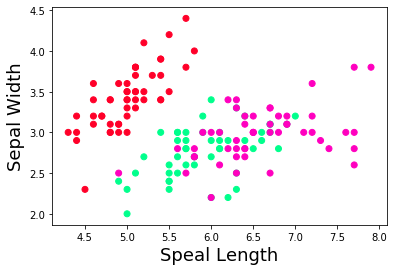

In [12]:
#VISUALISING CLUSTERS
y = iris.target
plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

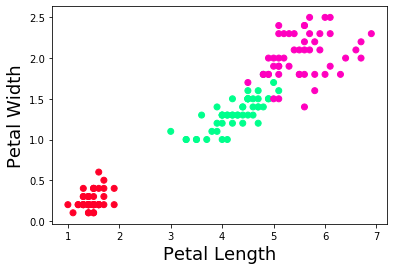

In [13]:
y = iris.target
plt.scatter(x[:,2], x[:,3], c=y, cmap='gist_rainbow')
plt.xlabel('Petal Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification

In [14]:
#Finding the optimum number of clusters for k-means classification
sos = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(x)
    sos.append(km.inertia_)

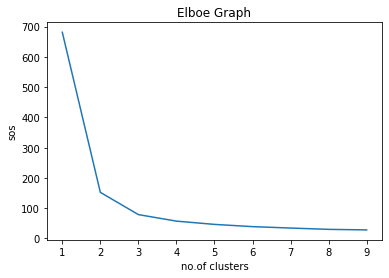

In [15]:
#Plotting the results onto a Elbow graph
plt.plot(range(1,10), sos)
plt.title('Elboe Graph')
plt.xlabel('no.of clusters')
plt.ylabel('sos')
plt.show()

# so,the no.of clusters we use = 3


In [16]:
#Applying kmeans to the dataset 
Kmeans = KMeans(n_clusters = 3)
y_Kmeans = Kmeans.fit_predict(x)
y_Kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

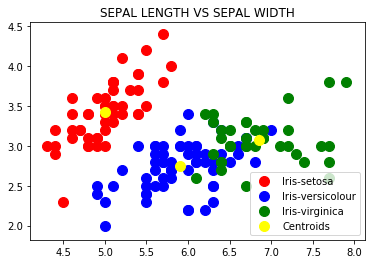

In [17]:
#Visualising the clusters
plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.title('SEPAL LENGTH VS SEPAL WIDTH')
#Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

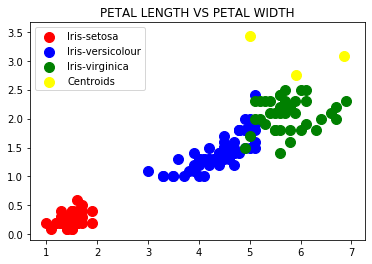

In [18]:
#Visualising the clusters
plt.scatter(x[y_Kmeans == 0, 2], x[y_Kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 2], x[y_Kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 2], x[y_Kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')
plt.title('PETAL LENGTH VS PETAL WIDTH')
#Plotting the centroids of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()